<a href="https://colab.research.google.com/github/rosangithub/ANIDS/blob/branch1/ANIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Based Network Intrusion Detection System using Ensemble Machine learning


In [199]:
# # 1️⃣ Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [200]:
import numpy as np#linear algebra
import pandas as pd#data preprocessing,CSV files
import pickle#saving and loading trained model
from os import path
#importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import(StandardScaler,OrdinalEncoder,LabelEncoder,MinMaxScaler,OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer,MaxAbsScaler,RobustScaler,PowerTransformer
#importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [201]:
import glob
#path to your folder containing csv files
folder_path="/content/drive/MyDrive/data/raw/"
#get  a list of all csv files in the folder
csv_files=glob.glob(folder_path + "*.csv")
#Read all the csv files and combine them into one dataframe
df_list=(pd.read_csv(file) for file in csv_files)
df=pd.concat(df_list,ignore_index=True)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [202]:
#display the shape and the find the concatinated dataframe
nRow,nCol=df.shape
print(f"Rows:{nRow},Columns: {nCol}")


Rows:2830743,Columns: 79


In [203]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# Preliminary data analysis

Some general info about the dataset. It contains roughly 2.5 million records across 79 columns. Data consists of mostly int64 and float64 types, except 3 attributes of 'object' type.

Dataset contains of network traffic data during different attacks, represented with values like: port numbers, IP adressses, packet lenghts, SYN/ACK/FIN/.. flag counts, packet size and other...


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:

# print(df['Label'].unique())
# len(df['Label'].unique())

In [ ]:
df.columns=df.columns.str.strip()
df['Label'].value_counts()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=df['Label'].where(df['Label']!='BENIGN')

In [ ]:
plt.figure(figsize=(15,6))
chart=sns.countplot(x=data,palette="Set1")
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

Most records in the dataset are of DDos and DOS Hulk attacks and portscan. This might pose a problem later in model training, considering that there is a very small amount of data for most attacks. Model selection will be greatly influenced by this information.

# Data Cleaning

This chapter contains data cleaning code. We go through the process of renaming columns, removing NaN and non-finite values (-inf, inf) to get the data ready for visualization and model training.

## Renaming columns


In [ ]:
# #remove the whitespace in the columns names
# col_names=[col.replace(' ', '')for col in df.columns]
# df.columns=col_names
# df.head()

In [ ]:
df['Label'].unique()
# here we can see that  'Label' columns contains the some wiered characters.

In [ ]:
# #this next snippet uses regular expressions to replace wierex character with dunder
# label_names=df['Label'].unique()
# import re

# label_names = df['Label'].unique()

# clean_labels = []
# for l in label_names:
#     # Replace non-alphanumeric characters with underscore
#     l = re.sub(r'[^a-zA-Z0-9]+', '_', l)
#     # Remove leading/trailing underscores
#     l = l.strip('_')
#     # Replace multiple consecutive underscores with single
#     l = re.sub(r'_+', '_', l)
#     clean_labels.append(l)

# clean_labels, len(clean_labels)


In [ ]:
# #replacing 'Label' columns with new readable values.
# labels=df['Label'].unique()
# for i in range(0,len(clean_labels)):
#   df['Label']=df['Label'].replace({labels[i]:clean_labels[i]})
# df['Label'].unique()

# Remove the missing values NaN from the dataframe

In [ ]:
df.dropna(inplace=True)


In [ ]:
df

In [ ]:
# #checking if there are any NULL value in dataset
# df.isnull().values.any()

In [ ]:
# #checking which columns contains null values
# [col for col in df if df[col].isnull().values.any()]

In [ ]:
# #checking how many null values it this coulumn contains
# df['FlowBytes/s'].isnull().sum()

In [ ]:

# # Considering that only 1358 rows contain NULL vlaues in the entire dataset, which makes about 0.047%, we
# # can safely remove all NULL rows without spoiling the data.
# 1358/df.shape[0]*100

In [ ]:
# # removing rows that contains NULL values and checking if numbers of removed rows is equal to  the number of the null values
# before=df.shape
# df.dropna(inplace=True)
# dfter=df.shape
# print("Number of rows removed:",before[0]-dfter[0])

In [ ]:
# df.isnull().any().any()

# Removing non-infinite values


In [ ]:
# import numpy as np
# #select all the columns except the label columns
# labl=df['Label']
# df=df.loc[:,df.columns != 'Label'].astype('float64')

In [ ]:
# #checking if all values are finite
# np.all(np.isfinite(df))

In [ ]:
# #checking what columns contains nonfinite values
# nonfinite=[col for col in df if not np.all(np.isfinite(df[col]))]
# nonfinite

In [ ]:
# #checking how many non fininte values each columns contains
# finite=np.isfinite(df['FlowBytes/s']).sum()
# df.shape[0]-finite

In [ ]:
# #checking how maby non finite values each collumns contains
# finite=np.isfinite(df['FlowPackets/s']).sum()
# df.shape[0]-finite

In [ ]:
# Same as before, since there is a small number of non-finite values we can safely remove them from the dataset
# # without spoiling the dataset.

# # Replacing infinite values with NaN values.
# df=df.replace([np.inf,-np.inf],np.nan)

In [ ]:
# #we can see that now we have nan values again
# np.any(np.isnan(df))

In [ ]:
# #bringing the labels back into the dataset before deleting nan rows
# df=df.merge(labl,how='outer',left_index=True,right_index=True)

In [ ]:
# #removing new NaN values
# df.dropna(inplace=True)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
# #saving cleaned dataset
# df.to_csv('cleaned_dataset.csv',index=False)

In [ ]:
#

# Data visualization
So, by now we know our dataset has 78 features and is split into 15 categories (14 attacks and 1 "normal" state). Next step is to try and visualize what the dataset looks like in feature space. For this we will use principal component analysis (PCA) to reduce dimensionality and then pass the reduced dataset to t-SNE (t - Distributed Stohastic Neighbor Entities) for visual representation in 2D space.

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# %matplotlib inline


In [ ]:
# #we are going to pick 10000 random rows from the dataset for visualization purpose
# #setting the random seed for reproducability of results
# np.random.seed(42)
# rand_perm=np.random.permutation(df.shape[0])


In [ ]:
# feature_cols=df.columns[:-1]
# df_subset=df.iloc[rand_perm[:10000],:]

In [ ]:
# df_subset=df_subset.replace([np.inf,-np.inf],np.nan)
# df_subset.dropna(inplace=True)

In [ ]:
# df_subset=df_subset[feature_cols].values

In [ ]:
# #performing the principle component analysis. with just 19 component the varience ration remains 99% which is great
# from sklearn.decomposition import PCA

# # 3. Apply PCA
# pca = PCA(n_components=19)
# pca_res = pca.fit_transform(df_subset)  # <-- use X, not df_subset

# # 4. Free memory if needed
# df_subset = None

# # 5. Check variance explained by 19 components
# variance_explained = np.sum(pca.explained_variance_ratio_)
# print("Total variance explained by 19 components:", variance_explained)


In [ ]:
# #computing t-SNE
# tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
# tsne_res = tsne.fit_transform(pca_res)
# print("done")

In [ ]:
# df_subset['tsne-one']=tsne_res[:,0]
# df_subset['tsne-two']=tsne_res[:,1]


In [ ]:
# plt.figure(figsize=(16,16))
# sns.scatterplot(
#     x="tsne_firstD",y="tsne_secondD",
#     palette=sns.color_palette("hls",colors),
#     data=df_subset,
#     hue='Label',
#     alpha=0.3
# )

## Plotting the histogram of the data

In [ ]:
import matplotlib.pyplot as plt  # for plotting graphs
import numpy as np               # for numerical operations and dtype checking
%matplotlib inline

def plot_per_column_distribution(df, n_graph_shown, n_graph_per_row):
    """
    This function plots the distribution of values for multiple columns in a DataFrame.
    Numeric columns are shown as histograms.
    Categorical columns (with few unique values) are shown as bar charts.

    Parameters:
    df: pandas DataFrame
        The dataset containing columns to plot
    n_graph_shown: int
        Maximum number of columns to plot
    n_graph_per_row: int
        Number of plots to show in each row
    """

    # Count unique values in each column
    nunique = df.nunique()

    # Select columns with 2 to 49 unique values for plotting
    columns_to_plot = df.columns[(nunique > 1) & (nunique < 50)]
    print(columns_to_plot)

    # Create a smaller DataFrame containing only selected columns
    df_to_plot = df[columns_to_plot]

    # Get the number of rows and columns in the filtered DataFrame
    n_rows, n_cols = df_to_plot.shape

    # Calculate how many rows of plots we need in the figure
    n_graph_row = (n_cols + n_graph_per_row - 1) // n_graph_per_row  # integer division

    # Create the figure with calculated size
    plt.figure(num=None,
               figsize=(6 * n_graph_per_row, 8 * n_graph_row),  # width x height in inches
               dpi=80,                                         # resolution
               facecolor='w',                                  # figure background color
               edgecolor='k')                                  # figure border color

    # Loop through each selected column (up to n_graph_shown)
    for i, col_name in enumerate(columns_to_plot[:n_graph_shown]):
        # Create a subplot in the grid
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)

        # Get data of the current column
        column_data = df_to_plot[col_name]

        # Check if the column is numeric
        if np.issubdtype(column_data.dtype, np.number):
            # If numeric, plot histogram
            column_data.hist()
        else:
            # If categorical, count unique values and plot bar chart
            value_counts = column_data.value_counts()
            value_counts.plot.bar()

        # Label y-axis
        plt.ylabel('counts')

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)

        # Set the title of the subplot using f-string
        plt.title(f'{col_name} (column {i})')

    # Adjust spacing between subplots to prevent overlap
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

    # Display the figure
    plt.show()


In [ ]:
plt.rcParams['figure.figsize']=(30,30)
plot_per_column_distribution(df, 79, 5)


## plot the bar graph


In [ ]:
def bar_graph(feature):
  df[feature].value_counts().plot(kind="bar")


In [ ]:
plt.rcParams['figure.figsize']=(15,15)
bar_graph("Label")

In [ ]:
import seaborn as sns
p=sns.distplot(a=df['Flow Duration'])
plt.show()

## plotting the piechart


In [ ]:
plt.figure(figsize=(20,20))
plt.pie(df['Label'].value_counts(),labels=df['Label'].unique(),autopct="%0.2f%%")
plt.title("pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
#increase the figure size

plt.figure(figsize=(20,20))
#piechart distribution of normal and abnormal labels
labels=df['Label'].unique()
sizes=df['Label'].value_counts()
explode=(0.1,)*len(labels)#exploide all the slices slightly
plt.pie(sizes,labels=labels,autopct="%0.2f%%",explode=explode,startangle=90)
plt.title("pie chart distribution of normal and abnormal labels")
plt.legend(labels,loc='best')
plt.show()

In [ ]:
df.shape

In [ ]:
df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


In [ ]:
df.shape

In [ ]:

df['Label'].value_counts()

In [ ]:
df['Label'].unique()

In [ ]:
import pandas as pd
#assuming df is your datafram with the given dataset
#create a list of classes you want to keep all records for
classes_to_keep = ['DoS GoldenEye','FTP-Patator','DoS slowloris','DoS Slowhttptest',
                   'Bot','SSH-Patator','Web Attack � Brute Force','Web Attack � XSS',
                   'Infiltration','Web Attack � Sql Injection','Heartbleed']

#create  a list of classes you want to limit to 100000 records
classes_to_limit=['BENIGN','DoS Hulk','PortScan','DDoS']
#filter rows for classes to keep all records
df_keep=df[df['Label'].isin(classes_to_keep)]
#filter rows for classes to keep all records
df_limit=df[df['Label'].isin(classes_to_limit)].groupby("Label").head(50000)
#combine the filtered rows
result_df=pd.concat([df_keep,df_limit])
#shuffle the resulting dataframe to mix the classes
result_df=result_df.sample(frac=1,random_state=42).reset_index(drop=True)

In [ ]:
result_df.shape

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
#pie chart distribution of normal and abnormal labels
labels=result_df['Label'].unique()
sizes=result_df['Label'].value_counts()
explode=(0.1,)*len(labels)#explode all slieces slightly
plt.pie(sizes,labels=labels,autopct="%0.2f%%",explode=explode,startangle=90)
plt.title("pie chart distribution of normal and abnormal labels")
plt.legend(labels,loc='best')
plt.show()

## Label encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder

#make acopy of your dataframe
df_encoded=result_df.copy()
#create alabel encoder object
le=LabelEncoder()
#fit and transform the label column and assign the transformed values to a new column
df_encoded['Label']=le.fit_transform(result_df['Label'])
#print the mapping of original labels to encoded values
label_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
print(label_mapping)
#display the modified dataframe
print("\n Encoded datarame:")
df_encoded.head()

In [ ]:
import joblib
#save the label encoder to file
encoder_file_path='label_encoder.pkl'
joblib.dump(le,encoder_file_path)

## making correlation matrix

In [ ]:
import seaborn as sns
#set the correlation threshold
correlation_threshold=0.15
#calulate the correlation matrix
corr=df_encoded.corr()
#filter column based on the correlation threshold
columns_to_include=corr.columns[abs(corr['Label'])>=correlation_threshold]
filtered_corr=corr.loc[columns_to_include,columns_to_include]
#plot the filtered correlation heatmap
fig,ax=plt.subplots(figsize=(15,15))
colormap=sns.diverging_palette(150,50,as_cmap=True)
sns.heatmap(filtered_corr,cmap=colormap,annot=True,fmt=".2f")
plt.xticks(range(len(filtered_corr.columns)),filtered_corr.columns)
plt.yticks(range(len(filtered_corr.columns)),filtered_corr.columns)
plt.show()


In [ ]:
#split your data into X and Y
X=df_encoded.drop('Label',axis=1)
y=df_encoded['Label']


In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import pandas as pd

#split the data into trainng and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#initialize random forest classifier
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)

#fit the model to the training data
rf_classifier.fit(X_train,y_train)

#get feature importances
feature_importances=rf_classifier.feature_importances_

#create dataframe with feature with names and their importances
feature_importance_df=pd.DataFrame({'Feature':X.columns,'Importance':feature_importances})

#sort the dataframe by importance in decending order
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

#select the top 20 features
top_features=feature_importance_df.head(20)['Feature'].tolist()

#filter your original dataframe to include only top 20 features
df_top_features=df_encoded[top_features+['Label']]

#display the dataframe with top features
df_top_features.head()


,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Flow Packets/s,Packet Length Std,Flow IAT Mean,Avg Fwd Segment Size,Flow IAT Max,...,Avg Bwd Segment Size,Bwd Packet Length Mean,Flow Duration,Bwd Packet Length Std,Bwd Packet Length Max,Subflow Bwd Bytes,Total Length of Bwd Packets,Destination Port,Packet Length Variance,Label
0,2,2.000000,18518.518520,2,2,37037.037040,2.309401,5.400000e+01,2.000000,54,...,6.000000,6.000000,54,0.000000,6,6,6,10243,5.333333e+00,10
1,439,54.875000,1.199319,439,439,2.798411,1801.039718,3.848338e+05,54.875000,5000031,...,1938.666667,1938.666667,5002839,2544.918912,5792,11632,11632,80,3.243744e+06,3
2,397,56.714286,0.051276,397,397,0.123061,2797.778452,8.864748e+06,56.714286,97500000,...,2319.000000,2319.000000,97512230,4414.366206,10136,11595,11595,80,7.827564e+06,4
3,2,2.000000,23255.813950,2,2,46511.627910,2.309401,4.300000e+01,2.000000,43,...,6.000000,6.000000,43,0.000000,6,6,6,3945,5.333333e+00,10
4,249,68.555556,0.074651,617,617,0.158634,508.378561,6.697792e+06,68.555556,107000000,...,669.750000,669.750000,107164673,617.075534,1460,5358,5358,443,2.584488e+05,0


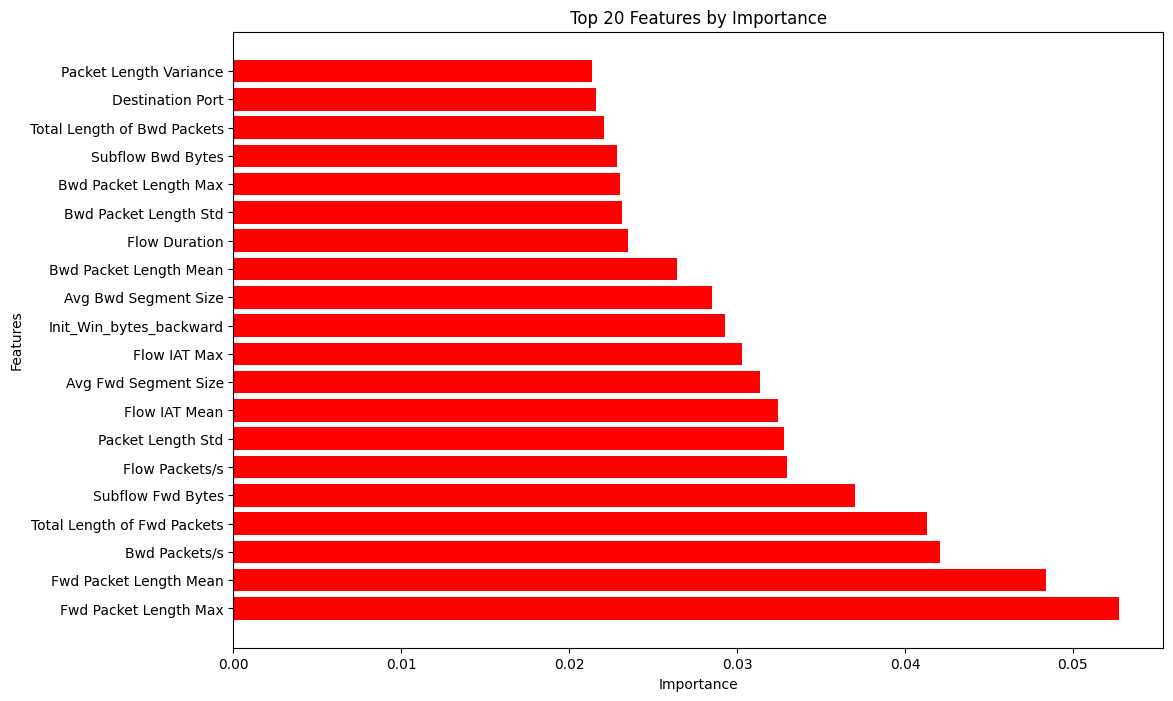

In [198]:
import matplotlib.pyplot as plt
#create a bar plot of the top 20 features and their importances
plt.figure(figsize=(12,8))
plt.barh(top_features,feature_importance_df.head(20)['Importance'],color='red')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Features by Importance')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
#assumming feature_importance-df is the datafram with feature importances
#sort the dataframe by importance in  decending order
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

#create bar plot of all the features and their importance
plt.figure(figsize=(12,8))
plt.barh(feature_importance_df['Feature'],feature_importance_df['Importance'],color="blue")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('All Features and their Importance')
plt.show()

In [ ]:
df_top_features.info()

In [ ]:
#assumming the label is the target variable
X_top_features=df_top_features.drop(['Label'],axis=1)
y_top_features=df_top_features['Label']

#split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X_top_features,y_top_features,test_size=0.2,random_state=42)

In [ ]:
X_train.info()

In [ ]:
X_test.info()

## Storing the top features

In [ ]:
X_top_features.to_csv('X_top_features.csv',index=False)
y_top_features.to_csv('y_top_features.csv',index=False)

In [ ]:
print("Infinity values in X_train:",np.any(np.isinf(X_train)))
print("NaN values in X_train:",np.any(np.isnan(X_train)))
print("Infinity values in X_test:",np.any(np.isinf(X_test)))
print("NaN values in X_test:",np.any(np.isnan(X_test)))

In [ ]:
# #from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:

def print_all_accuracy_metric(algorithm,name):
  #computing the accuracy ,f1score,precision and recall of the model performance
  #predicting the target value from the model of the samples
  y_train_log=algorithm.predict(X_train)
  y_test_log=algorithm.predict(X_test)
  acc_train_log=metrics.accuracy_score(y_train,y_train_log)

  acc_test_log=metrics.accuracy_score(y_test,y_test_log)
  print(name,": Accuracy on training Data:{:.3f}".format(acc_train_log))
  print(name,": Accuracy on test data:{:.3f}".format(acc_test_log))
  print()

  f1_score_train_log=metrics.f1_score(y_train,y_train_log,average='macro')
  f1_score_test_log=metrics.f1_score(y_test,y_test_log,average='macro')
  print(name,": F1 score on training data:{:.3f}".format(f1_score_train_log))
  print(name,": F1 score on test data:{:.3f}".format(f1_score_test_log))
  print()

  recall_score_train_log=metrics.recall_score(y_train,y_train_log,average='macro')
  recall_score_test_log=metrics.recall_score(y_test,y_test_log,average='macro')
  print(name,": Recall score on training data:{:.3f}".format(recall_score_train_log))
  print(name,": Recall score on test data:{:.3f}".format(recall_score_test_log))
  print()

  precision_score_train_log=metrics.precision_score(y_train,y_train_log,average='macro')
  precision_score_test_log=metrics.precision_score(y_test,y_test_log,average='macro')
  print(name,": Precision score on training data:{:.3f}".format(precision_score_train_log))
  print(name,": precision socre on test dat:{:.3f}".format(precision_score_test_log))
  print()

  print("\n\n Classification Report \n\n")
  print(metrics.classification_report(y_test,y_test_log))
  print("\n\n")

# Machine Learning

 ## 1.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clfd=DecisionTreeClassifier(criterion='entropy',max_depth=4)
clfd.fit(X_train,y_train)

print_all_accuracy_metric(clfd,"DecisionTreeClassifier")
#save the model using joblib
joblib.dump(clfd,'DecisionTreeClassifier.joblib')

## 2. SVM(Support vector machine)

In [ ]:
# from sklearn.svm import SVC
# #create the SVM model
# svm_model=SVC(kernel='linear',C=1.0)

# #fit the model in the training data
# svm_model.fit(X_train,y_train)

# print_all_accuracy_metric(svm_model,'SVM')
# #save the model using joblib
# joblib.dump(svm_model,'SVM.joblib')

## 3. RandomForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
print_all_accuracy_metric(rf_clf,'RandomForestClassifier')
#save the model using joblib
joblib.dump(rf_clf,'RandomForestClassifier.joblib')

## 3.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
# make the prediction on the test set
y_pred=knn_clf.predict(X_test)
print_all_accuracy_metric(knn_clf,'KNeighborsClassifier')

#save the model using jolib
joblib.dump(knn_clf,'KneighborsClassifier.joblib')

## 4.Naive Bayes


In [ ]:
# Naive Bayes classifier model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
nb=GaussianNB()
#fit the model
nb.fit(X_train,y_train)
print_all_accuracy_metric(nb,'Naive Bayes')
joblib.dump(nb,'GaussianNB.joblib')

In [ ]:
pip install catboost

## 5 catboost

In [ ]:
import catboost
from catboost import CatBoostClassifier
catboost_model=CatBoostClassifier(iterations=10,learning_rate=0.1,depth=6)
catboost_model.fit(X_train,y_train)
print_all_accuracy_metric(catboost_model,'CatBoostClassifier')
joblib.dump(catboost_model,'CatBoostClassifier.joblib')

##6.Logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model=LogisticRegression()
logreg_model.fit(X_train,y_train)
print_all_accuracy_metric(logreg_model,'LogisticRegression')
joblib.dump(logreg_model,'LogisticRegression.joblib')

##7. Hybrid Model


In [ ]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
#import or define print_all_accuracy_matric function
#define the meta model
meta_model=RandomForestClassifier(n_estimators=100,random_state=42)
#Define the base model
logreg_model=LogisticRegression()
clfd=DecisionTreeClassifier(criterion='entropy',max_depth=4)
knn_clf=KNeighborsClassifier(n_neighbors=5)
catboost_model=CatBoostClassifier(iterations=10,learning_rate=0.1,depth=6)
#define the stacking ensemble model
stacked_model=StackingClassifier(
    estimators=[('DescisionTree',clfd),('LogisticRegression',logreg_model),('KNN',knn_clf),('CatBoostClassifier',catboost_model)],
    final_estimator=meta_model,
    cv=5# cross validation
)
#train the stacking ensemble model
stacked_model.fit(X_train,y_train)
#evalute the peroformance of the stacking ensemble model
print_all_accuracy_metric(stacked_model,'Hybrid Model')
#joblib.dump(stacked_model,'Hybrid Model.joblib')

In [ ]:
joblib.dump(stacked_model,'StackingEnsemble.joblib')

In [ ]:
# later, when you want to make predictions
#load the model from the file
import joblib
loaded_model=joblib.load('StackingEnsemble.joblib')

# Saving data for testing

In [ ]:
print(X_top_features.iloc[0])
print("\n\noutput:",y_top_features.iloc[0])

In [ ]:
# make predictions using the loaded model
#create a new dataframe with first row
first_row_df=X_top_features.head(1)
prediction=loaded_model.predict(first_row_df)
#print the prediction
print(f"The predicted class is :{prediction[0]}")

In [ ]:
print(X_top_features.iloc[1])
print("\n\noutput:",y_top_features.iloc[1])

In [ ]:
#make prediction using the loaded model
#create a new dataframe with the first row
first_row_df=X_top_features.head(2).tail(1)
prediction=loaded_model.predict(first_row_df)
#print the prediction
print(f"The predicted class is :{prediction[0]}")

In [ ]:
first_row_df.to_csv('first_row_df.csv')

In [ ]:
first_row_df

In [ ]:
#create a new datafram with the first row
first_row_df=X_top_features.head(10)
first_row_df.to_csv("first_x_10_row_df.csv",index=False)
#create a new dataframe with the first 10 row
first_row_df=y_top_features.head(10)
first_row_df.to_csv("first_y_10_row_df.csv",index=False)

In [ ]:
#create a new datafrma with the last row
first_row_df=X_top_features.head(-10)
first_row_df.to_csv("first_x_10_df_1.csv",index=False)
#create a new datframe with the first row
first_row_df=y_top_features.head(-10)
first_row_df.to_csv("first_y_10_df_1.csv",index=False)

In [ ]:
# Assuming X_top_features and y_top_feature are your dataframes
middle_rows_X=X_top_features.loc[15:24]#select rows 16 to 25
middle_rows_y=y_top_features.loc[15:24]

#save the middle rows to CSV files
middle_rows_X.to_csv("middle_x_10_rows.csv",index=False)
middle_rows_y.to_csv("middle_y_10_rows.csv",index=False)

In [ ]:
#create a new dataframe with the first row
first_row_df=X_top_features.head(1)
first_row_df.to_csv("first_x_row_df.csv",index=False)

first_row_df=y_top_features.head(1)
first_row_df.to_csv("first_y_row_df.csv",index=False)

In [ ]:
#assumming X_top_features and y_top_features are your dataframes
last_row_X=X_top_features.tail(10)
last_row_y=y_top_features.tail(10)
#save the last rows to the csv files
last_row_X.to_csv("last_x_10_rows.csv",index=False)
last_row_y.to_csv("last_y_10_rows.csv",index=False)

# Live Testing

In [ ]:
# import joblib
import pandas as pd
#load the model from the file
model_filename='StackingEnsemble.joblib'
loaded_model=joblib.load(model_filename)
#define the order and types of features manually
feature_order=[
    'Fwd Packet Length Max',
    'Fwd Packet Length Mean',
    'Bwd Packets/s',
    'Total Length of Fwd Packets',
    'Subflow Fwd Bytes',
    'Flow Packets/s',
    'Packet Length Std',
    'Flow IAT Mean',
    'Avg Fwd Segment Size',
    'Flow IAT Max',
    'Init_Win_bytes_backward',
    'Avg Bwd Segment Size',
    'Bwd Packet Length Mean',
    'Flow Duration',
    'Bwd Packet Length Std',
    'Bwd Packet Length Max',
    'Subflow Bwd Bytes',
    'Total Length of Bwd Packets',
    'Destination Port',
    'Packet Length Variance'       ]


In [ ]:
#funtion to take user input and make prediction
def make_prediction():
    user_input = {}

    # prompt the user for input for each feature
    for column in feature_order:
        value = input(f"Enter value for {column}: ")
        # convert to float (safe for most ML models)
        user_input[column] = float(value)

    # create a dataframe with the user input
    user_data = pd.DataFrame(user_input, index=[0])

    # make predictions using the loaded model
    prediction = loaded_model.predict(user_data)

    # print the prediction
    print(f"The predicted class is: {prediction[0]}")


In [ ]:
make_prediction()

# confusion matrix
